# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. 분석의 목적과 변수 확인

In [4]:
titanic_df = pd.read_csv('/jupyter/Data/Titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
## 각 Column의 데이터 타입 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. 데이터 전체적으로 살펴보기

In [11]:
# 수치형 데이터 전체의 정보를 얻는 함수 describe()
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**상관성 != 인과성**  
상관성: A up, B up, ...  
인과성: A -> B

In [16]:
# 결측치 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### I. Survived Column

In [20]:
# 생존자, 사망자 수

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
# 생존자의 수와 사망자의 수를 Barplot으로 시각화

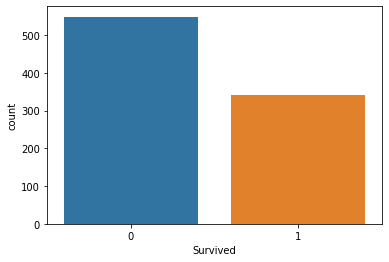

In [23]:
sns.countplot(x='Survived', data=titanic_df)
plt.show()

### II. Pclass

In [30]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [31]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [32]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


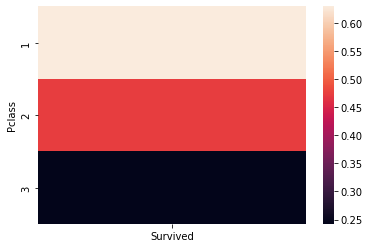

In [35]:
# 히트맵 활용
sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.show()

### III. Sex

In [36]:
titanic_df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [39]:
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

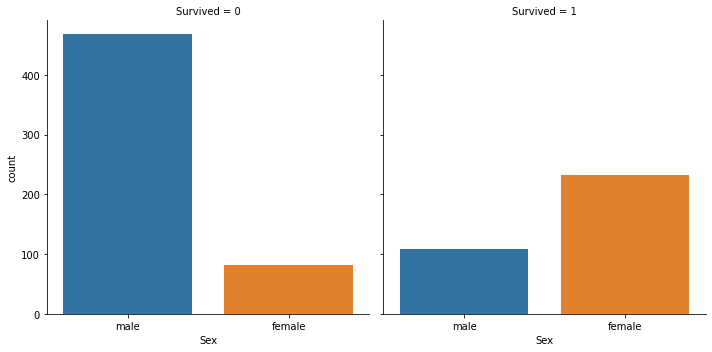

In [44]:
# sns.catplot

sns.catplot(x='Sex', col='Survived', kind='count',data=titanic_df)
plt.show()

### IV. Age

In [45]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

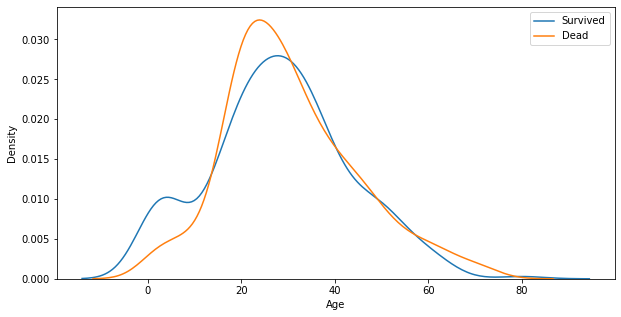

In [51]:
# Survived 1, 0의 Age의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)
plt.legend(['Survived', 'Dead'])
plt.show()

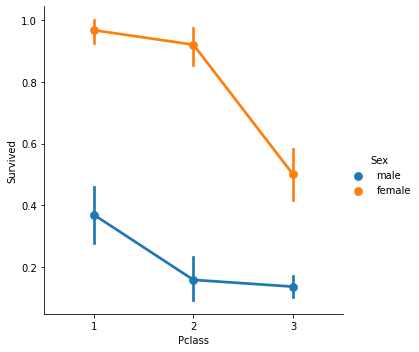

In [59]:
sns.catplot(x='Pclass', y='Survived', kind='point', hue='Sex', data=titanic_df)

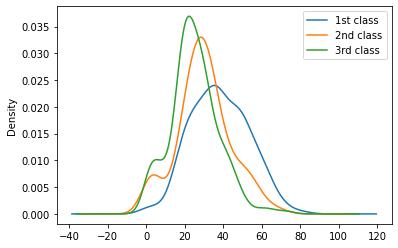

In [64]:
# Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')
plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

### 과제1

In [93]:
print('생존자 평균 Fare: {0:.1f}'.format(titanic_df['Fare'][titanic_df['Survived'] == 1].mean()))
print('사망자 평균 Fare: {0:.1f}'.format(titanic_df['Fare'][titanic_df['Survived'] == 0].mean()))

생존자 평균 Fare: 48.4
사망자 평균 Fare: 22.1


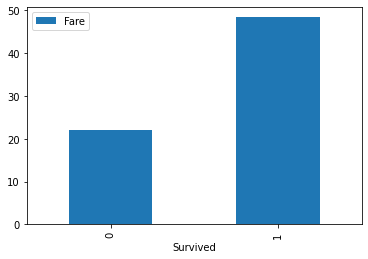

In [120]:
titanic_df[['Survived', 'Fare']].groupby('Survived').mean().plot.bar()
plt.show()

생존자의 Fare이 사망자의 Fare 보다 상대적으로 높음을 알 수 있다.

### 과제2

**Heart Failure Prediction Dataset**  
https://www.kaggle.com/fedesoriano/heart-failure-prediction

**Attribute Information**  
  
  
`Age`: age of the patient [years]  
`Sex`: sex of the patient [M: Male, F: Female]  
`ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
`RestingBP`: resting blood pressure [mm Hg]  
`Cholesterol`: serum cholesterol [mm/dl]  
`FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
`RestingECG`: resting electrocardiogram results  
[Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),  
LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
`MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]  
`ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]  
`Oldpeak`: oldpeak = ST [Numeric value measured in depression]  
`ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
`HeartDisease`: output class [1: heart disease, 0: Normal]  

In [135]:
heart_df = pd.read_csv('/jupyter/Data/HeartFailure/heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [137]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### I. Sex

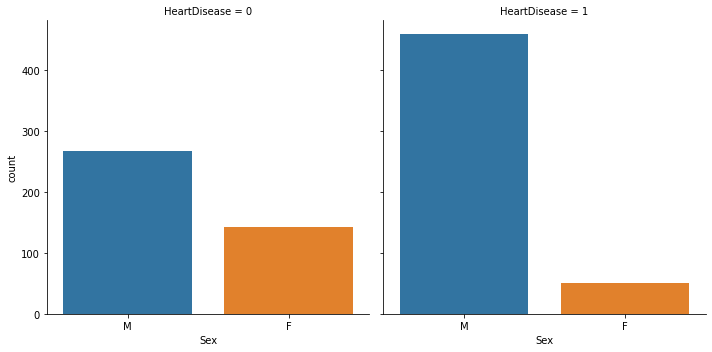

In [127]:
sns.catplot(x='Sex', col='HeartDisease', kind='count', data=heart_df)
plt.show()

주어진 데이터에서 남성이 여성보다 심장질환 발생 비율이 높다

### II. Age

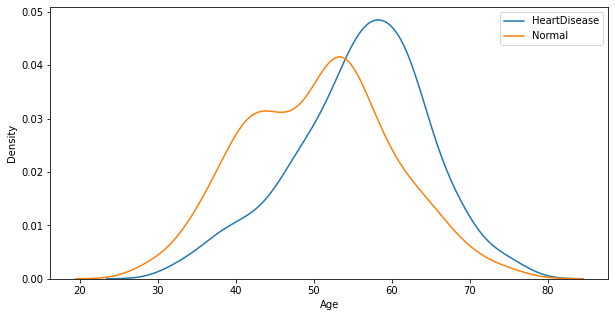

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=heart_df[heart_df.HeartDisease == 1]['Age'], ax=ax)
sns.kdeplot(x=heart_df[heart_df.HeartDisease == 0]['Age'], ax=ax)
plt.legend(['HeartDisease', 'Normal'])
plt.show()

In [142]:
print('심장 질환을 가진 사람의 평균 나이: {0:.1f}'.format(heart_df[heart_df['HeartDisease'] == 1]['Age'].mean()))
print('심장 질환이 없는 사람의 평균 나이: {0:.1f}'.format(heart_df[heart_df['HeartDisease'] == 0]['Age'].mean()))

심장 질환을 가진 사람의 평균 나이: 55.9
심장 질환이 없는 사람의 평균 나이: 50.6


심장 질환을 가진 사람의 평균 나이가 정상인 사람 보다 상대적으로 높음을 알 수 있다.

### III. ChestPainType

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

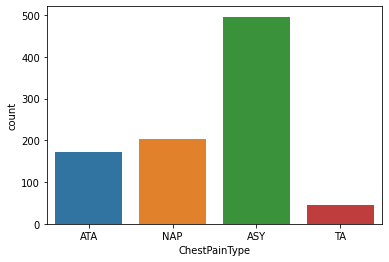

In [143]:
sns.countplot(x=heart_df['ChestPainType'], data=heart_df)

In [152]:
heart_df.groupby(['ChestPainType', 'HeartDisease'])['HeartDisease'].count()

ChestPainType  HeartDisease
ASY            0               104
               1               392
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
Name: HeartDisease, dtype: int64

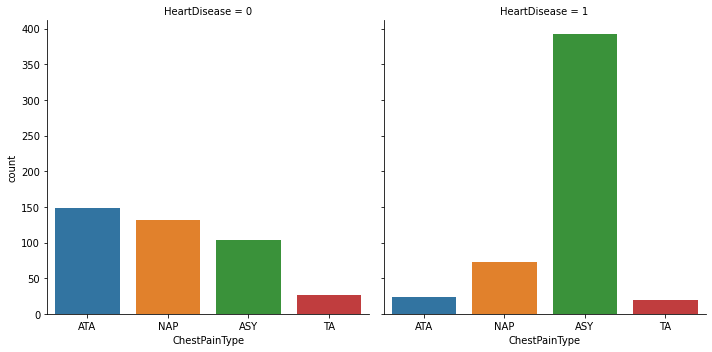

In [155]:
sns.catplot(x='ChestPainType', col='HeartDisease', kind='count',data=heart_df)
plt.show()

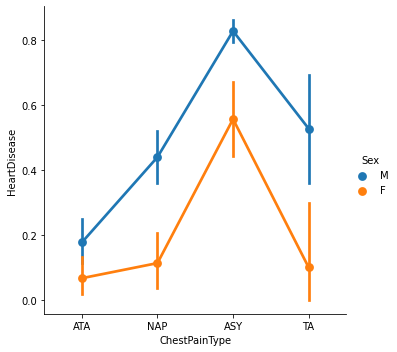

In [161]:
sns.catplot(x='ChestPainType', y='HeartDisease', hue='Sex', kind='point', data=heart_df)
plt.show()

ChestPainType 이 ASY인 경우 심장질환을 가진 환자일 확률이 높고 ATA인 경우에는 심장 질환이 없을 가능성이 높다.